In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2022-march-laptop-data/Cleaned_Laptop_data.csv


In [2]:
#Just reading the csv file
data = pd.read_csv('/kaggle/input/2022-march-laptop-data/Cleaned_Laptop_data.csv')
data.info() # A small part in describing the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   895 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           871 non-null    object 
 6   ram_type         871 non-null    object 
 7   ssd              896 non-null    int64  
 8   hdd              896 non-null    int64  
 9   os               896 non-null    object 
 10  os_bit           896 non-null    int64  
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [3]:
#Printout of the different types of categorical attributes present here
for items in data.columns:
    print(data[items].value_counts(),'\n')
#uncomment for looking at the data statistics

ASUS         254
DELL         154
Lenovo       148
HP           142
acer          58
MSI           52
APPLE         28
Avita         18
LG             5
Vaio           5
realme         4
Nokia          4
Infinix        4
ALIENWARE      4
Smartron       3
lenovo         3
MICROSOFT      3
RedmiBook      3
Mi             2
SAMSUNG        1
iball          1
Name: brand, dtype: int64 

Core          95
Inspiron      77
VivoBook      50
Vivobook      39
Pavilion      38
              ..
GE76           1
Commercial     1
X390           1
G3             1
v15            1
Name: model, Length: 120, dtype: int64 

Intel            645
AMD              208
Apple             24
NVIDIA             7
MediaTek           3
Pre-installed      3
First              2
Qualcomm           1
512                1
M.2                1
64                 1
Name: processor_brand, dtype: int64 

Core i5              292
Core i3              170
Core i7              111
Ryzen 5               82
Ryzen 7           

In [4]:
## There's a lot of "missing" data in processor generation....so let's drop that data
data2 = data.drop(labels=['processor_gnrtn','old_price'],axis=1)
# Also, there is a lot of 'Missing' in the OS Section, let us replace it by default 'Windows'
data2['os'] = data2['os'].str.replace('Missing','Windows')
data2.shape

(896, 21)

In [5]:
# planning to convert all categorial values into numerical types (maybe wrong, but who cares!)
from sklearn.preprocessing import OrdinalEncoder
categorical_encoder =OrdinalEncoder()
cat_labels = ['brand','model','processor_brand','processor_name','ram_type','ram_gb','os','display_size','weight','Touchscreen','msoffice']
cat_vars = data2[cat_labels]
data_cat_encoded =  categorical_encoder.fit_transform(cat_vars)

#instead of all this, just for the sake of a simple model, I'll drop all the categorial variables
# data3 = data2.drop(labels=cat_labels,axis=1)
# data3
# data_cat_encoded.tolist()
data_cat_encoded_invert = data_cat_encoded.transpose()

In [6]:
# Not even gonna touch this now...gotta come back to it later....
for i in range(len(cat_labels)):
# for cols in cat_labels:
    data2[cat_labels[i]]=data_cat_encoded_invert[i][:].tolist()
#     print(data_cat_encoded[i][:].transpose().tolist())
# # df['new_column'] = array_name.tolist()
data2

,brand,model,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,...,weight,display_size,warranty,Touchscreen,msoffice,latest_price,discount,star_rating,ratings,reviews
0,2.0,25.0,5.0,4.0,3.0,3.0,0,1024,1.0,64,...,0.0,14.0,1,0.0,0.0,23990,11,3.8,15279,1947
1,2.0,105.0,5.0,6.0,5.0,3.0,512,0,1.0,64,...,0.0,14.0,1,0.0,0.0,37990,25,4.3,990,108
2,2.0,106.0,5.0,6.0,5.0,3.0,0,1024,1.0,64,...,0.0,8.0,1,0.0,0.0,32890,30,3.9,28,4
3,5.0,30.0,5.0,6.0,5.0,3.0,512,0,1.0,64,...,2.0,14.0,1,0.0,1.0,42990,25,4.4,158,18
4,5.0,30.0,5.0,7.0,5.0,3.0,512,0,1.0,64,...,2.0,14.0,0,0.0,0.0,54990,21,4.2,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,4.0,30.0,5.0,6.0,5.0,3.0,256,1024,1.0,64,...,2.0,14.0,0,0.0,0.0,46390,21,2.9,95,5
892,4.0,30.0,5.0,6.0,5.0,3.0,0,1024,1.0,64,...,2.0,11.0,0,0.0,0.0,40390,26,3.2,83,15
893,5.0,78.0,5.0,7.0,5.0,3.0,128,0,1.0,64,...,2.0,4.0,1,0.0,0.0,76012,0,4.3,129,16
894,2.0,106.0,5.0,6.0,3.0,3.0,0,1024,1.0,64,...,2.0,8.0,0,0.0,0.0,33990,15,3.4,31,6


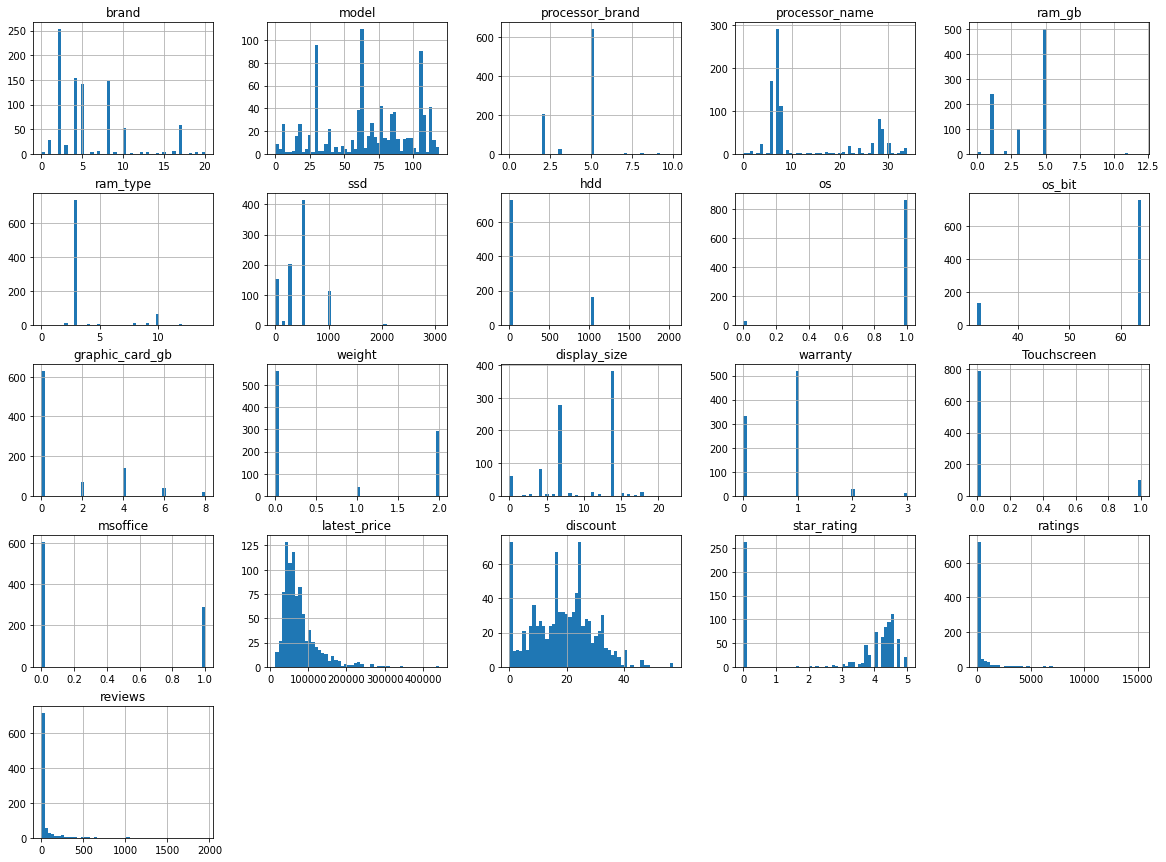

In [7]:
#trying to plot the data and trying to map the things
data2.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
# Cleaning out whatever categorical data is left using Imputer
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data3 = my_imputer.fit_transform(data2)
data3 = pd.DataFrame(data3, columns = data2.columns)
# data3

In [9]:
# preparing for machine learning
from sklearn.model_selection import train_test_split
indepVar = data3.drop('latest_price',axis=1)
dependVar = data3['latest_price']

# for col in indepVar.columns:
#     indepVar[col]=indepVar[col].str.replace('Dual','')
# indepVar.str.replace('Dual','')

X_train, X_test, y_train, y_test = train_test_split(indepVar,dependVar,random_state=10,test_size=0.2)
X_train

,brand,model,processor_brand,processor_name,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,discount,star_rating,ratings,reviews
721,2.0,82.0,5.0,7.0,5.0,3.0,0.0,1024.0,1.0,64.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,2.0,114.0,5.0,8.0,5.0,8.0,512.0,0.0,1.0,64.0,0.0,2.0,7.0,1.0,0.0,0.0,14.0,4.4,18.0,0.0
403,2.0,115.0,5.0,7.0,5.0,10.0,512.0,0.0,1.0,32.0,0.0,0.0,7.0,1.0,0.0,1.0,19.0,4.7,76.0,14.0
163,10.0,30.0,5.0,6.0,5.0,3.0,512.0,0.0,1.0,64.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.5,17.0,3.0
578,4.0,108.0,5.0,6.0,3.0,3.0,256.0,1024.0,1.0,64.0,0.0,2.0,7.0,1.0,0.0,1.0,24.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,4.0,64.0,5.0,7.0,1.0,3.0,512.0,0.0,1.0,64.0,0.0,2.0,13.0,1.0,0.0,1.0,0.0,4.2,72.0,7.0
320,2.0,105.0,5.0,6.0,3.0,3.0,0.0,1024.0,1.0,64.0,0.0,2.0,14.0,1.0,0.0,0.0,14.0,3.7,4203.0,490.0
527,17.0,29.0,5.0,7.0,5.0,3.0,512.0,0.0,1.0,64.0,4.0,0.0,14.0,1.0,0.0,0.0,17.0,0.0,0.0,0.0
125,4.0,64.0,5.0,7.0,5.0,3.0,512.0,0.0,1.0,64.0,0.0,0.0,7.0,0.0,1.0,0.0,22.0,4.3,3.0,0.0


In [10]:
#actually deploying the linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [11]:
# This doesn't seem like much of results!, but we lost a lot of variables trying to encode categorical variables
# Should try encoding and testing again.
from sklearn.metrics import mean_squared_error, r2_score
predictions = lin_reg.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.6894512102810224
The rmse is:  26753.34830905378
